In [2]:
import pandas as pd
data=pd.read_excel('中心城市客运量 广州.xlsx',engine='openpyxl',header=0)
print(data.shape)
data.head()

(48, 3)


,时间,中心城市客运量:广州:累计值:月,中心城市客运量:广州:当期值:月
0,2022-12-31,374417,18319
1,2022-11-30,356098,13942
2,2022-10-31,342156,31599
3,2022-09-30,310557,35338
4,2022-08-31,275219,38040


In [3]:
# 将时间列转换为日期时间类型并按时间升序排列
data['时间'] = pd.to_datetime(data['时间'])
data = data.sort_values(by='时间')

In [4]:
# 重置索引并添加新的序号列
data = data.reset_index(drop=True)

In [5]:
data.head()

,时间,中心城市客运量:广州:累计值:月,中心城市客运量:广州:当期值:月
0,2019-01-31,51280,51280
1,2019-02-28,89736,38456
2,2019-03-31,143972,54236
3,2019-04-30,195113,51141
4,2019-05-31,248139,53027


In [6]:
data.columns

Index(['时间', '中心城市客运量:广州:累计值:月', '中心城市客运量:广州:当期值:月'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   时间                48 non-null     datetime64[ns]
 1   中心城市客运量:广州:累计值:月  48 non-null     int64         
 2   中心城市客运量:广州:当期值:月  48 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.3 KB


In [8]:
df = pd.DataFrame(data)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# 对数据进行归一化处理
data = df[['中心城市客运量:广州:累计值:月']]
scaled_data = scaler.fit_transform(data)
# 将归一化后的数据存储回DataFrame中
df['归一值（累计值）'] = scaled_data

In [10]:
# 对数据进行归一化处理
data = df[['中心城市客运量:广州:当期值:月']]
scaled_data = scaler.fit_transform(data)
# 将归一化后的数据存储回DataFrame中
df['归一值（当期值）'] = scaled_data

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\86158\AppData\Local\Temp\ipykernel_94624\449356305.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['归一值（累计值）'],kde=False, rug=True)


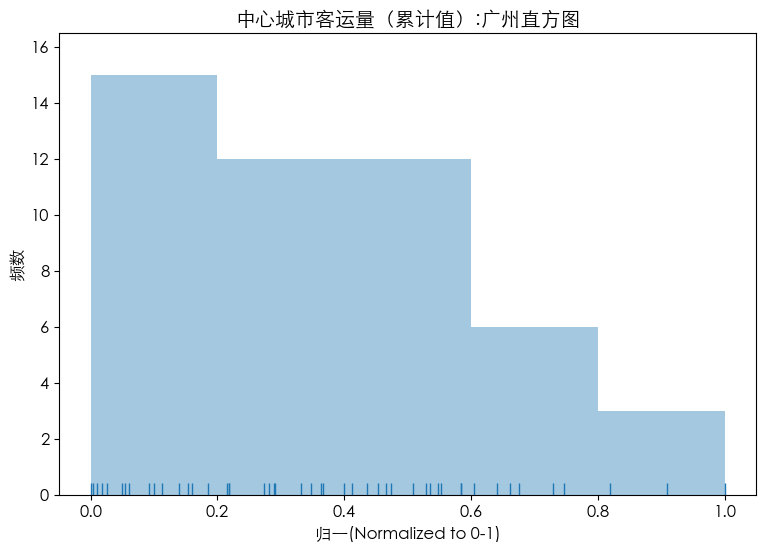

In [12]:
# 绘制归一值直方图（累计值）
plt.rc('font', family='STXihei', size=12)
plt.figure(figsize=(9, 6))
sns.distplot(df['归一值（累计值）'],kde=False, rug=True)
plt.xlabel('归一(Normalized to 0-1)')
plt.ylabel('频数')
plt.title('中心城市客运量（累计值）:广州直方图')
plt.show()

C:\Users\86158\AppData\Local\Temp\ipykernel_94624\3753981096.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['归一值（当期值）'],kde=False, rug=True)


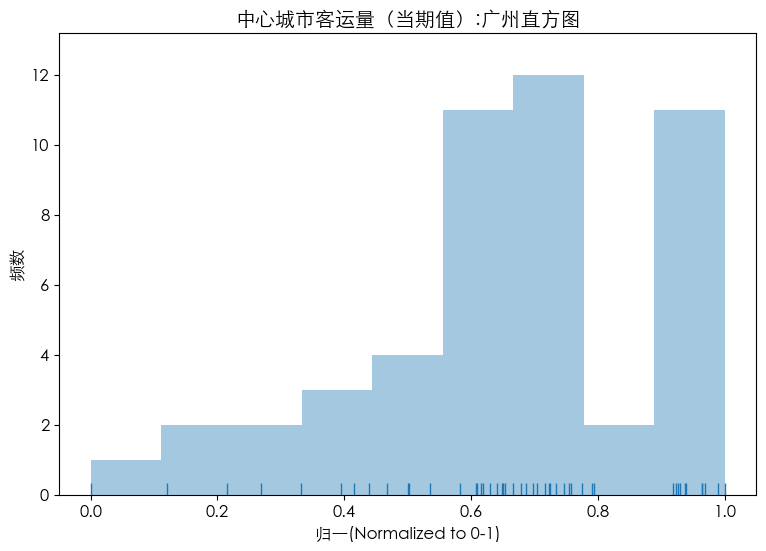

In [13]:
# 绘制归一值直方图（当期值）
plt.figure(figsize=(9, 6))
sns.distplot(df['归一值（当期值）'],kde=False, rug=True)
plt.xlabel('归一(Normalized to 0-1)')
plt.ylabel('频数')
plt.title('中心城市客运量（当期值）:广州直方图')
plt.show()